In [1]:
import pandas as pd
import numpy as np
from varname import nameof

import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup
import html
import lxml

sns.set_theme()
pd.options.display.max_seq_items = 2000

In [2]:
df_path = "../data/Health/"

# ------------- PULLING DATASETS -------------
demographic = pd.read_csv(df_path + "demographic.csv")
diet = pd.read_csv(df_path + "diet.csv")
examination = pd.read_csv(df_path + "examination.csv")
labs = pd.read_csv(df_path + "labs.csv")
medications = pd.read_csv(df_path + "medications.csv")
questionnaire = pd.read_csv(df_path + "questionnaire.csv")

datasets = [demographic, diet, examination, labs, medications, questionnaire]

# ------------- DFS MERGE -------------
full_df = pd.merge(demographic, diet, how = "outer", on = "SEQN")
full_df = pd.merge(full_df, examination, how = "outer", on = "SEQN")
full_df = pd.merge(full_df, labs, how = "outer", on = "SEQN")
#full_df = pd.merge(full_df, medications, how = "outer", on = "SEQN")           # This one doesn't match correctly on SEQN, so I'll leave it out as it is not interesting for me anyway
full_df = pd.merge(full_df, questionnaire, how = "outer", on = "SEQN")


# ------------- SOME WORKAROUND -------------
full_df = full_df.set_index("SEQN")

full_df = full_df[full_df["CSQ200"] != 9]
full_df = full_df[full_df["CSQ202"] != 9]
full_df = full_df[full_df["CSQ204"] != 9]
full_df = full_df[full_df["DIQ160"] != 9]
full_df = full_df[full_df["MCQ080"] != 9]
full_df = full_df[full_df["MCQ082"] != 9]
full_df = full_df[full_df["OSQ060"] != 9]

# ------------- DESCRIPTIONS -------------
#descriptions = pd.read_csv("../data/Health/final_column_names.csv")
descriptions = pd.read_excel("../data/Health/NAHNES 2014 Dictionary.xlsx")

full_df.shape

(10140, 1811)

Column MCQ220 has 4403 / 10140 missing values


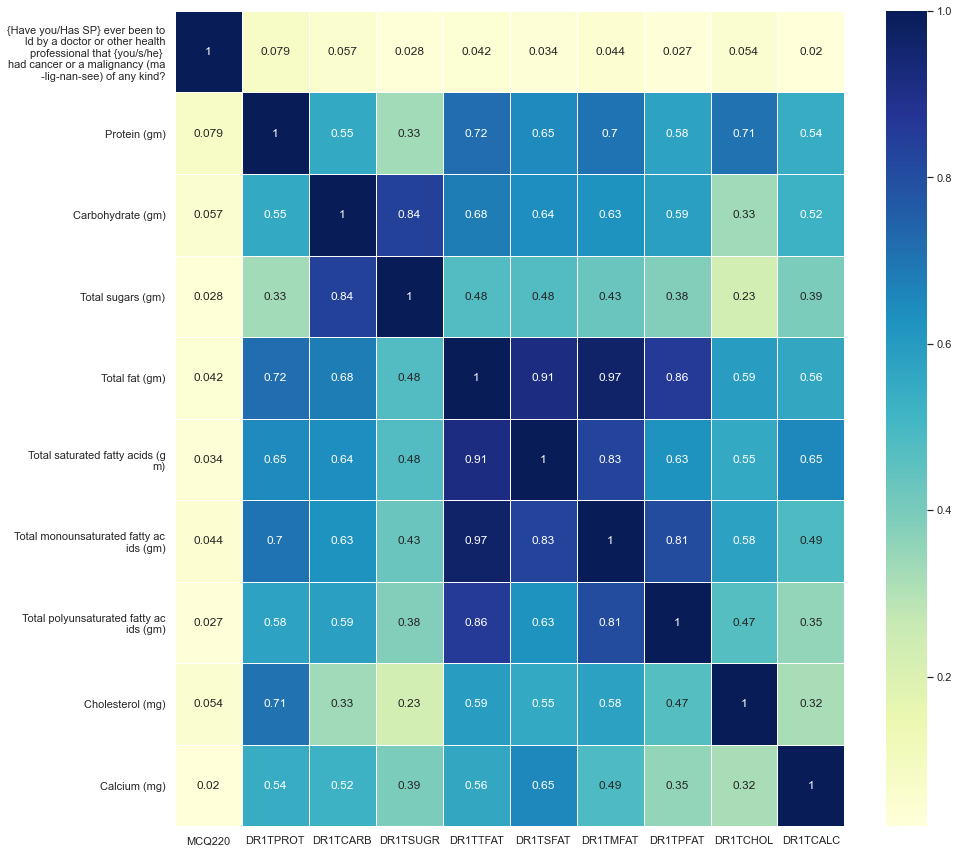

In [10]:
plt.figure(figsize = (15, 15))

health_condition = ["MCQ220"]
nutrients = ["DR1TPROT", "DR1TCARB", "DR1TSUGR", "DR1TTFAT", "DR1TSFAT", "DR1TMFAT", "DR1TPFAT", "DR1TCHOL", "DR1TCALC"]
filter_ = health_condition + nutrients

y_labels = []

for column in filter_:
    a = descriptions[descriptions["Variable Name"] == column]["Variable Description"].values[0]
    if len(a) < 30:
        y_labels.append(a)
    else:
        n = 30
        chunks = [a[i:i+n] for i in range(0, len(a), n)]
        new_a = '\n'.join(chunks)
        y_labels.append(new_a)

corr = full_df[filter_].corr()
sns.heatmap(corr, annot = True, linewidths = .5, cmap = "YlGnBu", yticklabels = y_labels)

print(f"Column {health_condition[0]} has {full_df[health_condition[0]].isna().sum()} / {len(full_df)} missing values")

plt.show()

In [15]:
test = pd.read_excel("../data/Health/NAHNES 2014 Dictionary.xlsx")
test.head()

,Variable Name,Variable Description
0,SEQN,Respondent sequence number.
1,RIDSTATR,Interview and examination status of the partic...
2,RIAGENDR,Gender of the participant.
3,RIDAGEYR,Age in years of the participant at the time of...
4,RIDAGEMN,Age in months of the participant at the time o...


In [20]:
descriptions["Variable Description"]

0                             Respondent sequence number.
1       Interview and examination status of the partic...
2                              Gender of the participant.
3       Age in years of the participant at the time of...
4       Age in months of the participant at the time o...
                              ...                        
5378                Are you circumcised or uncircumcised?
5379                          Respondent sequence number.
5380                                   Trichomonas, urine
5381                           Respondent sequence number
5382                                    Urinary Chlamydia
Name: Variable Description, Length: 5383, dtype: object

In [12]:
full_df["MCQ220"].unique()

array([ 2.,  1., nan])